In [2]:
from datasets import load_dataset
import pandas as pd
df = pd.read_parquet("T5_GT2NT/MathBridge_ver3.parquet", engine='fastparquet')

c:\Users\wjdrb\vscode_code\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df

,context_before,equation,context_after,spoken_English,equation_len
0,The horizontal axis represents the exponent range,"$ \in [ 3 , 7 ] $",. We selected those categorical colors from Co...,Belongs to the interval from 3 to 7.,17
1,Here,$ d\eta $,"denotes the system noise , modeled as a Wiener...",d eta.,9
2,The agent 's actions,$ a ( t ) $,are modeled by a stochastic control process wi...,a function of t,11
3,are modeled by a stochastic control process wi...,$ \sigma^2_t $,controlled by the agent and with a mean of zer...,sigma squared sub t.,14
4,Here,$ \deltat $,"denotes the physical time step , and we adopte...",delta t.,11
...,...,...,...,...,...
40127014,T `` ` * Find the singular values of,$ A $,and use them to determine the variance in the ...,A,5
40127015,* For what fraction of the variance do the fir...,$ A $,and construct the,A,5
40127016,matrix,$ B $,whose entries are the coordinates of the demea...,B,5
40127017,Evaluating the following cell will load the vo...,$ A $,,A,5


In [4]:
df['spoken_length'] = df['spoken_English'].str.len()
df['context_after_length'] = df['context_after'].str.len()
df['context_before_length'] = df['context_before'].str.len()

In [5]:
filtered_df = df.query('spoken_length < 300')
filtered_df = filtered_df.query('context_after_length < 250')
filtered_df = filtered_df.query('context_before_length < 200')

In [6]:
filtered_df

,context_before,equation,context_after,spoken_English,equation_len,spoken_length,context_after_length,context_before_length
0,The horizontal axis represents the exponent range,"$ \in [ 3 , 7 ] $",. We selected those categorical colors from Co...,Belongs to the interval from 3 to 7.,17,36,56,49
1,Here,$ d\eta $,"denotes the system noise , modeled as a Wiener...",d eta.,9,6,77,4
2,The agent 's actions,$ a ( t ) $,are modeled by a stochastic control process wi...,a function of t,11,15,57,20
3,are modeled by a stochastic control process wi...,$ \sigma^2_t $,controlled by the agent and with a mean of zer...,sigma squared sub t.,14,20,167,57
4,Here,$ \deltat $,"denotes the physical time step , and we adopte...",delta t.,11,8,67,4
...,...,...,...,...,...,...,...,...
40127014,T `` ` * Find the singular values of,$ A $,and use them to determine the variance in the ...,A,5,1,83,36
40127015,* For what fraction of the variance do the fir...,$ A $,and construct the,A,5,1,17,124
40127016,matrix,$ B $,whose entries are the coordinates of the demea...,B,5,1,152,6
40127017,Evaluating the following cell will load the vo...,$ A $,,A,5,1,0,142


In [7]:
# 필요없는 'length' 열을 제거
filtered_df = filtered_df.drop(columns='equation_len')
filtered_df = filtered_df.drop(columns='spoken_length')
filtered_df = filtered_df.drop(columns='context_after_length')
filtered_df = filtered_df.drop(columns='context_before_length')


In [8]:
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,context_before,equation,context_after,spoken_English
0,The horizontal axis represents the exponent range,"$ \in [ 3 , 7 ] $",. We selected those categorical colors from Co...,Belongs to the interval from 3 to 7.
1,Here,$ d\eta $,"denotes the system noise , modeled as a Wiener...",d eta.
2,The agent 's actions,$ a ( t ) $,are modeled by a stochastic control process wi...,a function of t
3,are modeled by a stochastic control process wi...,$ \sigma^2_t $,controlled by the agent and with a mean of zer...,sigma squared sub t.
4,Here,$ \deltat $,"denotes the physical time step , and we adopte...",delta t.
...,...,...,...,...
23389141,T `` ` * Find the singular values of,$ A $,and use them to determine the variance in the ...,A
23389142,* For what fraction of the variance do the fir...,$ A $,and construct the,A
23389143,matrix,$ B $,whose entries are the coordinates of the demea...,B
23389144,Evaluating the following cell will load the vo...,$ A $,,A


In [9]:
filtered_df.to_parquet('MathBridge_ver5.parquet',engine='pyarrow')

In [12]:
from datasets import load_dataset
import pandas as pd
df = pd.read_parquet("MathBridge_ver6.parquet", engine='fastparquet')

In [13]:
df['spoken_length'] = df['spoken_English'].str.len()
df['context_after_length'] = df['context_after'].str.len()
df['context_before_length'] = df['context_before'].str.len()
df['formula_length'] = df['equation'].str.len()

df['context_before_word_count'] = df['context_before'].str.split().str.len()
df['context_after_word_count'] = df['context_after'].str.split().str.len()


In [17]:
df

,context_before,equation,context_after,spoken_English,spoken_length,context_after_length,context_before_length,formula_length,context_before_word_count,context_after_word_count
0,The horizontal axis represents the exponent range,"$ \in [ 3 , 7 ] $",. We selected those categorical colors from Co...,Belongs to the interval from 3 to 7.,36,56,49,17,7,8
1,Here,$ d\eta $,"denotes the system noise , modeled as a Wiener...",d eta.,6,77,4,9,1,15
2,The agent 's actions,$ a ( t ) $,are modeled by a stochastic control process wi...,a function of t,15,57,20,11,4,9
3,are modeled by a stochastic control process wi...,$ \sigma^2_t $,controlled by the agent and with a mean of zer...,sigma squared sub t.,20,167,57,14,9,30
4,Here,$ \deltat $,"denotes the physical time step , and we adopte...",delta t.,8,67,4,11,1,12
...,...,...,...,...,...,...,...,...,...,...
23195826,T `` ` * Find the singular values of,$ A $,and use them to determine the variance in the ...,A,1,83,36,5,9,14
23195827,* For what fraction of the variance do the fir...,$ A $,and construct the,A,1,17,124,5,22,3
23195828,matrix,$ B $,whose entries are the coordinates of the demea...,B,1,152,6,5,1,23
23195829,Evaluating the following cell will load the vo...,$ A $,,A,1,0,142,5,27,0


In [18]:
df['formula_length'].mean()

12.657426802255975

In [19]:
df['formula_length'].max()

80

In [20]:
df[df['formula_length']==5]

,context_before,equation,context_after,spoken_English,spoken_length,context_after_length,context_before_length,formula_length,context_before_word_count,context_after_word_count
16084451,Figures on the top row are magnified views of ...,$ 1 $,", marked by orange-box on the left image , and...",one,3,74,52,5,10,15
16084452,and the bottom row shows region,$ 2 $,". With white background , the white cylinders ...",two,3,153,31,5,6,30
16084453,Experiment II : examples of selected exponent ...,$ 3 $,",",three,5,1,55,5,9,1
16084454,,$ 5 $,", and",five,4,5,0,5,0,2
16084455,and,$ 7 $,( from the second left to right ) . We could s...,seven,5,165,3,5,1,30
...,...,...,...,...,...,...,...,...,...,...
23195826,T `` ` * Find the singular values of,$ A $,and use them to determine the variance in the ...,A,1,83,36,5,9,14
23195827,* For what fraction of the variance do the fir...,$ A $,and construct the,A,1,17,124,5,22,3
23195828,matrix,$ B $,whose entries are the coordinates of the demea...,B,1,152,6,5,1,23
23195829,Evaluating the following cell will load the vo...,$ A $,,A,1,0,142,5,27,0


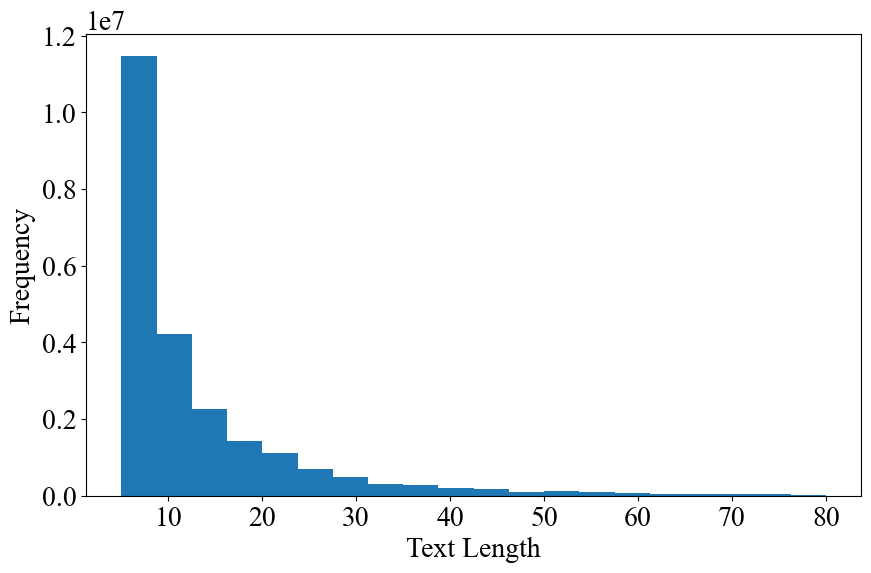

In [21]:
import matplotlib.pyplot as plt

csfont = {'fontname':'Times New Roman'}

plt.rcParams['font.family'] = 'Times New Roman' # 예: 'serif', 'sans-serif', 'monospace' 등
plt.rcParams['font.serif'] = 'Times New Roman' # 특정 글꼴로 지정
plt.rcParams['font.size'] = 20  # 글꼴 크기를 12pt로 설정4
fontsize = plt.rcParams['font.size']


plt.figure(figsize=(10, 6))
plt.hist(df['formula_length'], bins = 20, )
plt.xlabel('Text Length',fontsize=fontsize,**csfont)
plt.ylabel('Frequency',fontsize=fontsize,**csfont)

plt.savefig('AAAI_data.pdf', format='pdf', dpi=300)  # DPI 설정으로 해상도 조정
plt.show()
plt.close()

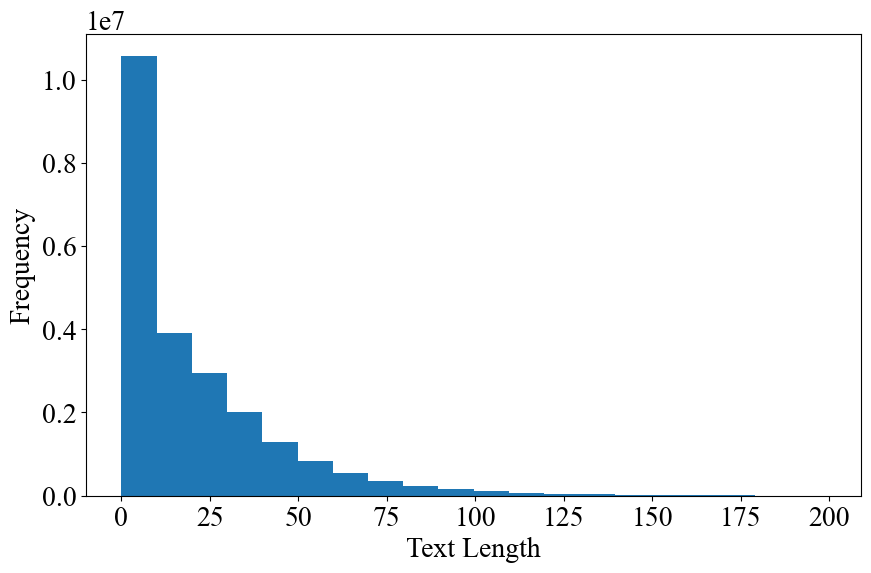

In [22]:
import matplotlib.pyplot as plt

csfont = {'fontname':'Times New Roman'}

plt.rcParams['font.family'] = 'Times New Roman' # 예: 'serif', 'sans-serif', 'monospace' 등
plt.rcParams['font.serif'] = 'Times New Roman' # 특정 글꼴로 지정
plt.rcParams['font.size'] = 20  # 글꼴 크기를 12pt로 설정4
fontsize = plt.rcParams['font.size']


plt.figure(figsize=(10, 6))
plt.hist(df['context_before_length'], bins = 20, )
plt.xlabel('Text Length',fontsize=fontsize,**csfont)
plt.ylabel('Frequency',fontsize=fontsize,**csfont)

plt.savefig('AAAI_data.pdf', format='pdf', dpi=300)  # DPI 설정으로 해상도 조정
plt.show()
plt.close()

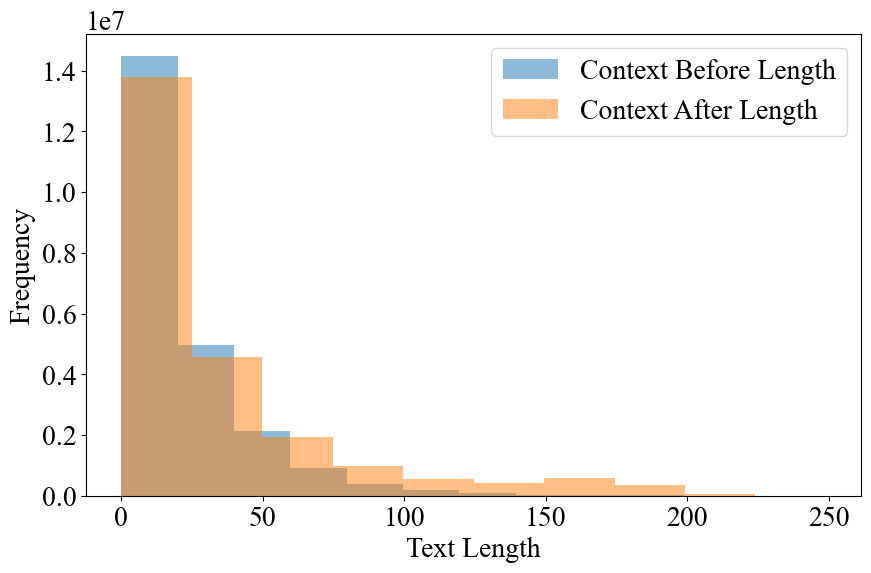

In [23]:
import matplotlib.pyplot as plt

# Times New Roman 글꼴 설정
csfont = {'fontname':'Times New Roman'}
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 20  # 글꼴 크기 설정

# 데이터 준비
# 여기서는 df['context_before_length']와 df['context_after_length']를 사용합니다.
data1 = df['context_before_length']
data2 = df['context_after_length']

plt.figure(figsize=(10, 6))

# 히스토그램 그리기
plt.hist(data1, bins=10, alpha=0.5, label='Context Before Length')
plt.hist(data2, bins=10, alpha=0.5, label='Context After Length')

# 축 이름 및 레이블 추가
plt.xlabel('Text Length', fontsize=plt.rcParams['font.size'], **csfont)
plt.ylabel('Frequency', fontsize=plt.rcParams['font.size'], **csfont)

# 범례 추가
plt.legend()

# 파일 저장
plt.savefig('AAAI_data.pdf', format='pdf', dpi=300)

# 그래프 보이기
plt.show()

# 그래프 닫기
plt.close()


In [24]:
# T5 토크나이저 불러오기
from transformers import T5Tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [25]:
text_column = 'context_before'

# 각 텍스트의 토큰 개수 계산
df['context_before_token_count'] = df[text_column].apply(lambda x: len(tokenizer.tokenize(x)))

In [26]:
df['context_after_token_count'] = df['context_after'].apply(lambda x: len(tokenizer.tokenize(x)))

In [27]:
df

,context_before,equation,context_after,spoken_English,spoken_length,context_after_length,context_before_length,formula_length,context_before_word_count,context_after_word_count,context_before_token_count,context_after_token_count
0,The horizontal axis represents the exponent range,"$ \in [ 3 , 7 ] $",. We selected those categorical colors from Co...,Belongs to the interval from 3 to 7.,36,56,49,17,7,8,10,15
1,Here,$ d\eta $,"denotes the system noise , modeled as a Wiener...",d eta.,6,77,4,9,1,15,1,24
2,The agent 's actions,$ a ( t ) $,are modeled by a stochastic control process wi...,a function of t,15,57,20,11,4,9,6,13
3,are modeled by a stochastic control process wi...,$ \sigma^2_t $,controlled by the agent and with a mean of zer...,sigma squared sub t.,20,167,57,14,9,30,13,36
4,Here,$ \deltat $,"denotes the physical time step , and we adopte...",delta t.,8,67,4,11,1,12,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...
23195826,T `` ` * Find the singular values of,$ A $,and use them to determine the variance in the ...,A,1,83,36,5,9,14,11,14
23195827,* For what fraction of the variance do the fir...,$ A $,and construct the,A,1,17,124,5,22,3,26,3
23195828,matrix,$ B $,whose entries are the coordinates of the demea...,B,1,152,6,5,1,23,1,35
23195829,Evaluating the following cell will load the vo...,$ A $,,A,1,0,142,5,27,0,33,0


In [56]:
df = df.query('spoken_length < 120')


In [61]:
col = ['context_before', 'equation', 'context_after', 'spoken_English']
df_hug = df[col]
df_hug = df_hug.reset_index(drop=True)
df_hug


,context_before,equation,context_after,spoken_English
0,The horizontal axis represents the exponent range,"$ \in [ 3 , 7 ] $",. We selected those categorical colors from Co...,Belongs to the interval from 3 to 7.
1,Here,$ d\eta $,"denotes the system noise , modeled as a Wiener...",d eta.
2,The agent 's actions,$ a ( t ) $,are modeled by a stochastic control process wi...,a function of t
3,are modeled by a stochastic control process wi...,$ \sigma^2_t $,controlled by the agent and with a mean of zer...,sigma squared sub t.
4,Here,$ \deltat $,"denotes the physical time step , and we adopte...",delta t.
...,...,...,...,...
23195826,T `` ` * Find the singular values of,$ A $,and use them to determine the variance in the ...,A
23195827,* For what fraction of the variance do the fir...,$ A $,and construct the,A
23195828,matrix,$ B $,whose entries are the coordinates of the demea...,B
23195829,Evaluating the following cell will load the vo...,$ A $,,A


In [62]:
df_hug.to_parquet('MathBridge_ver6.parquet', engine='pyarrow')

In [28]:
df['spoken_English_token_count'] = df['spoken_English'].apply(lambda x: len(tokenizer.tokenize(x)))

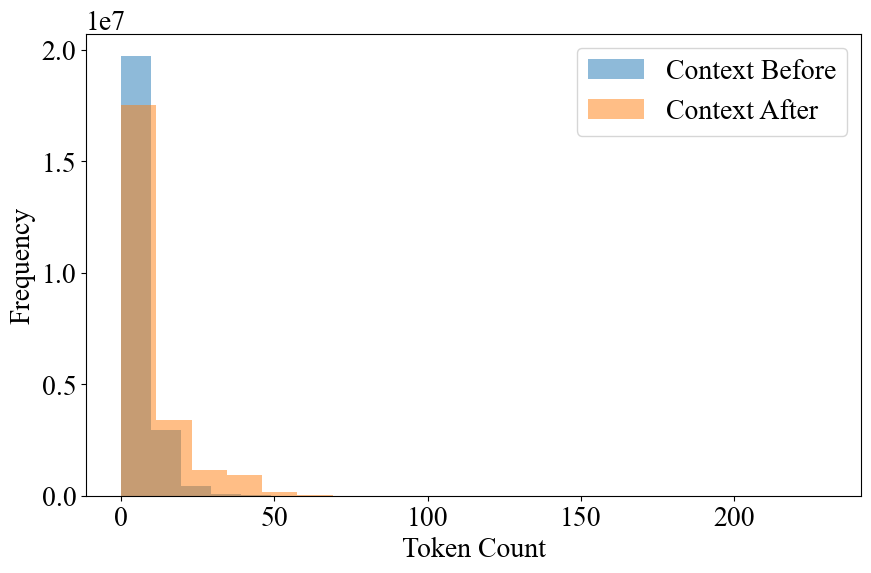

In [55]:
import matplotlib.pyplot as plt

# Times New Roman 글꼴 설정
csfont = {'fontname':'Times New Roman'}
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 20  # 글꼴 크기 설정

# 데이터 준비
# 여기서는 df['context_before_length']와 df['context_after_length']를 사용합니다.
data1 = df['context_before_token_count']
data2 = df['context_after_token_count']

plt.figure(figsize=(10, 6))

# 히스토그램 그리기
plt.hist(data1, bins=20, alpha=0.5, label='Context Before')
plt.hist(data2, bins=20, alpha=0.5, label='Context After')

# 축 이름 및 레이블 추가
plt.xlabel('Token Count', fontsize=plt.rcParams['font.size'], **csfont)
plt.ylabel('Frequency', fontsize=plt.rcParams['font.size'], **csfont)

# 범례 추가
plt.legend()

# 파일 저장
plt.savefig('context-text-token-count.pdf', format='pdf', dpi=300)

# 그래프 보이기
plt.show()

# 그래프 닫기
plt.close()


In [30]:
df['context_before_token_count'].mean()

4.89980302925987

In [31]:
df['context_after_token_count'].mean()

8.955753859389647

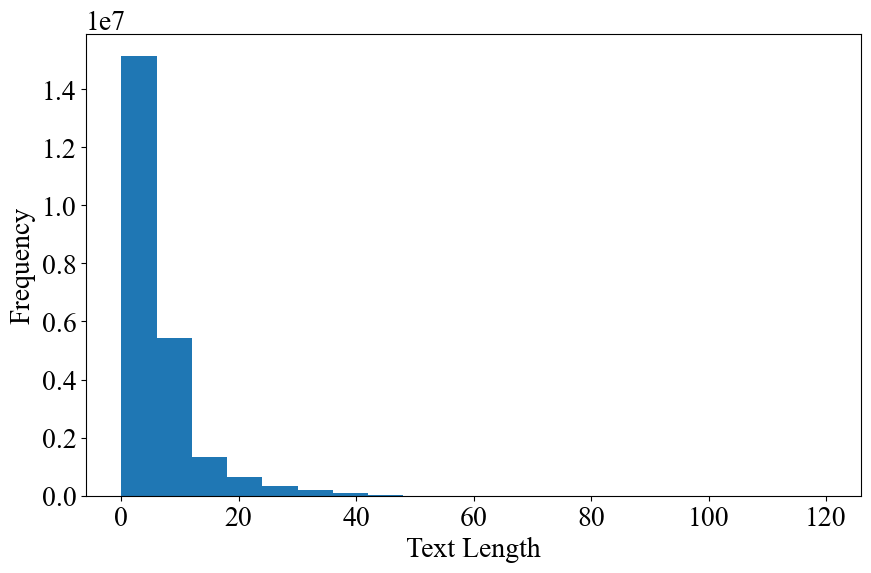

In [32]:
import matplotlib.pyplot as plt

csfont = {'fontname':'Times New Roman'}

plt.rcParams['font.family'] = 'Times New Roman' # 예: 'serif', 'sans-serif', 'monospace' 등
plt.rcParams['font.serif'] = 'Times New Roman' # 특정 글꼴로 지정
plt.rcParams['font.size'] = 20  # 글꼴 크기를 12pt로 설정4
fontsize = plt.rcParams['font.size']


plt.figure(figsize=(10, 6))
plt.hist(df['spoken_English_token_count'], bins = 20, )
plt.xlabel('Text Length',fontsize=fontsize,**csfont)
plt.ylabel('Frequency',fontsize=fontsize,**csfont)

plt.savefig('spoken_English_token_count.pdf', format='pdf', dpi=300)  # DPI 설정으로 해상도 조정
plt.show()
plt.close()

In [71]:
df['spoken_English_token_count'].mean()

5.796491059104543

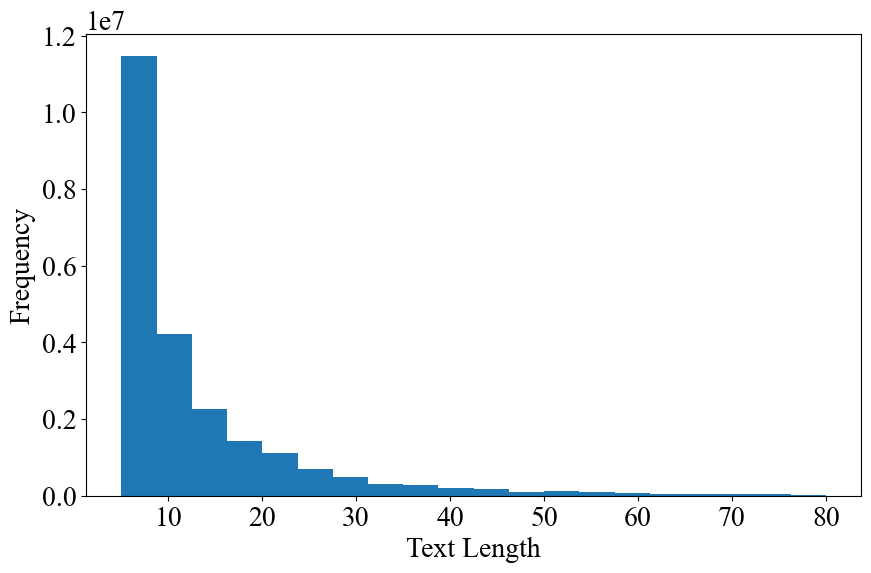

In [75]:
import matplotlib.pyplot as plt

csfont = {'fontname':'Times New Roman'}

plt.rcParams['font.family'] = 'Times New Roman' # 예: 'serif', 'sans-serif', 'monospace' 등
plt.rcParams['font.serif'] = 'Times New Roman' # 특정 글꼴로 지정
plt.rcParams['font.size'] = 20  # 글꼴 크기를 12pt로 설정4
fontsize = plt.rcParams['font.size']


plt.figure(figsize=(10, 6))
plt.hist(df['formula_length'], bins = 20, )
plt.xlabel('Text Length',fontsize=fontsize,**csfont)
plt.ylabel('Frequency',fontsize=fontsize,**csfont)

plt.savefig('formula_character_length.pdf', format='pdf', dpi=300)  # DPI 설정으로 해상도 조정
plt.show()
plt.close()

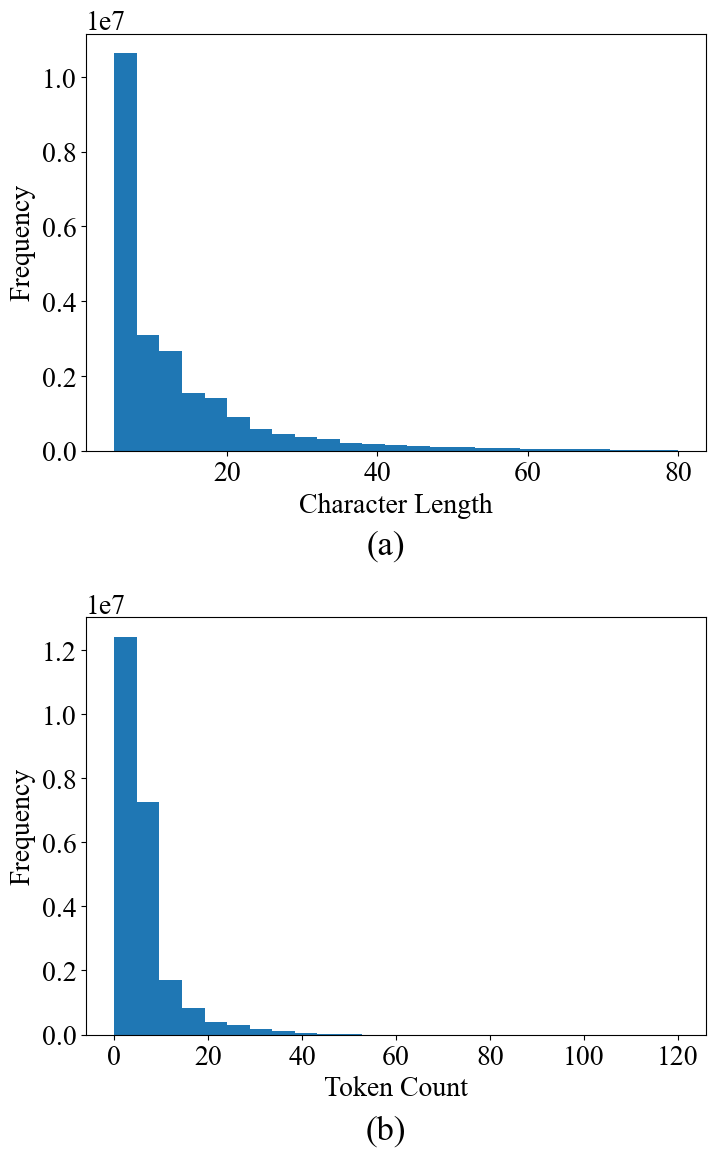

In [53]:
import matplotlib.pyplot as plt

# 기본 설정
csfont = {'fontname':'Times New Roman'}
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
fontsize = plt.rcParams['font.size']
bins = 25
# 서브플롯 생성
fig, axes = plt.subplots(2, 1, figsize=(8, 13))  # 2행 1열 서브플롯

# 첫 번째 그래프 (a)
axes[0].hist(df['formula_length'], bins=bins)
axes[0].set_xlabel('Character Length', fontsize=fontsize, **csfont)
axes[0].set_ylabel('Frequency', fontsize=fontsize, **csfont)

# 두 번째 그래프 (b)
axes[1].hist(df['spoken_English_token_count'], bins=bins)
axes[1].set_xlabel('Token Count', fontsize=fontsize, **csfont)
axes[1].set_ylabel('Frequency', fontsize=fontsize, **csfont)

# 서브플롯 사이 간격 조정
plt.subplots_adjust(hspace=0.4)  # hspace를 늘려서 간격을 조정

# 캡션 추가
fig.text(0.5, 0.48, '(a)', ha='center', fontsize=25)
fig.text(0.5, 0.03, '(b)', ha='center', fontsize=25)

# 저장 및 출력
plt.savefig('formula_ch_len_and_spoken_English_token_len.pdf', format='pdf', dpi=300)
plt.show()
plt.close()


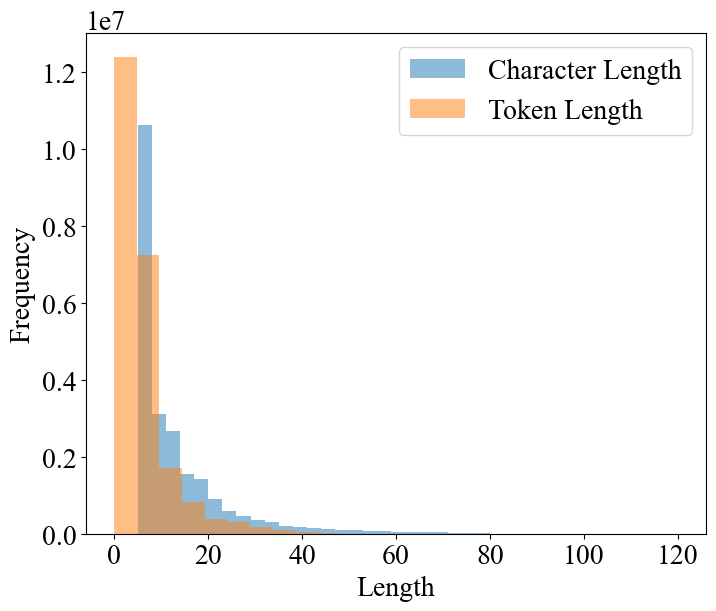

In [51]:
import matplotlib.pyplot as plt

# 기본 설정
csfont = {'fontname':'Times New Roman'}
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
fontsize = plt.rcParams['font.size']
bins = 25

# 그래프 생성
fig, ax = plt.subplots(figsize=(8, 6.5))

# 첫 번째 데이터셋 (formula_length) 히스토그램
ax.hist(df['formula_length'], bins=bins, alpha=0.5, label='Character Length')
# 두 번째 데이터셋 (spoken_English_token_count) 히스토그램
ax.hist(df['spoken_English_token_count'], bins=bins, alpha=0.5, label='Token Length')

# 축 라벨 설정
ax.set_xlabel('Length', fontsize=fontsize, **csfont)
ax.set_ylabel('Frequency', fontsize=fontsize, **csfont)

# 범례 추가
ax.legend(fontsize=fontsize)

# 그래프 저장 및 출력
plt.savefig('combined_hist.pdf', format='pdf', dpi=300)
plt.show()
plt.close()


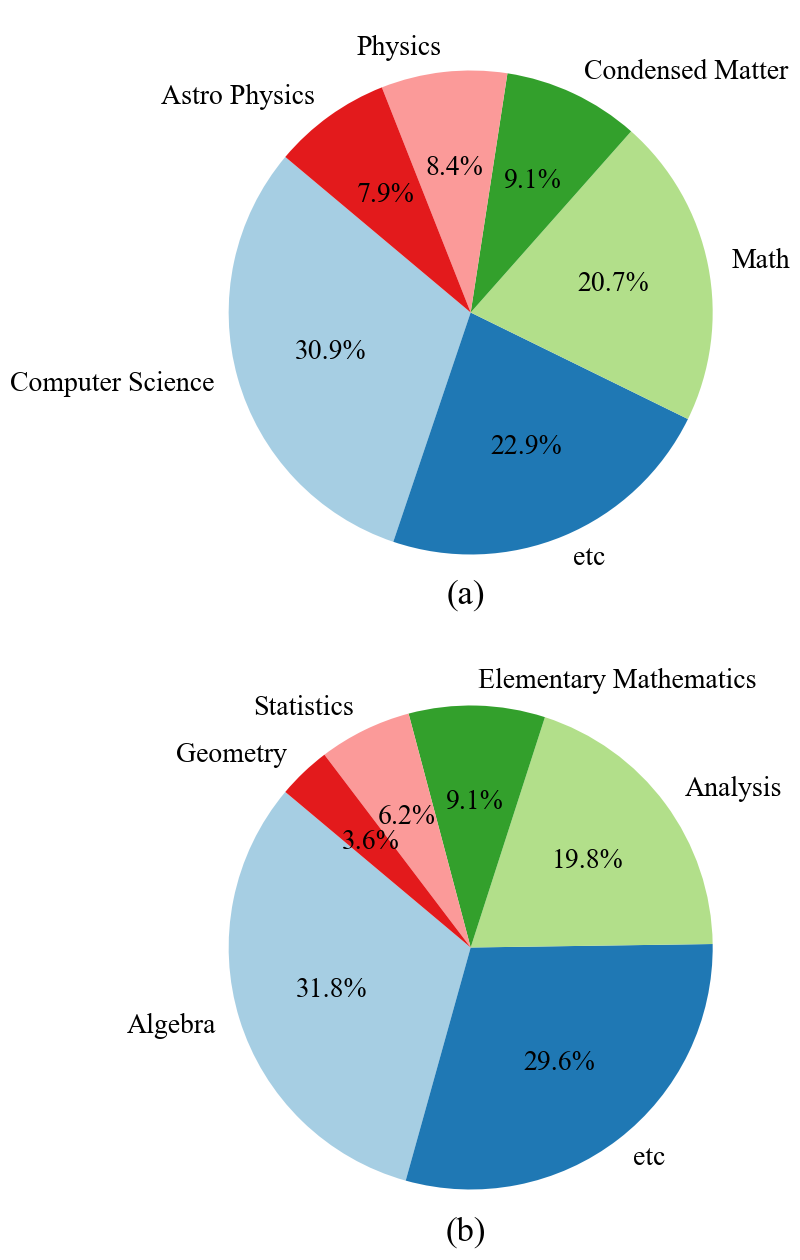

In [52]:
import matplotlib.pyplot as plt

csfont = {'fontname':'Times New Roman'}

plt.rcParams['font.family'] = 'Times New Roman' # 예: 'serif', 'sans-serif', 'monospace' 등
plt.rcParams['font.serif'] = 'Times New Roman' # 특정 글꼴로 지정
plt.rcParams['font.size'] = 20  # 글꼴 크기를 12pt로 설정4
fontsize = plt.rcParams['font.size']
import matplotlib.pyplot as plt


# Data setup
categories1 = ["Elementary Mathematics", "Analysis", "Algebra",  "Statistics", "Geometry", "etc"]
values1 = [1627, 3544, 5687, 1109, 637, 1038+4250]
total1 = sum(values1)

categories2 = ["Math", "Computer Science", "Condensed Matter", "Physics", "Astro Physics", "etc"]
values2 = [20.7, 30.9, 9.1, 8.4, 7.9, 22.9]
total2 = sum(values2)

percentages1 = [x / total1 * 100 for x in values1]
percentages2 = [x / total2 * 100 for x in values2]

# Sort data by percentage in descending order for pie chart
sorted_data1 = sorted(zip(percentages1, categories1), reverse=True)
sorted_percentages1, sorted_categories1 = zip(*sorted_data1)

sorted_data2 = sorted(zip(percentages2, categories2), reverse=True)
sorted_percentages2, sorted_categories2 = zip(*sorted_data2)

# Plotting pie charts
fig, axs = plt.subplots(2, 1, figsize=(10, 13))

# Pie chart for the first dataset
axs[1].pie(sorted_percentages1, labels=sorted_categories1, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sorted_categories1))))
#axs[0].set_title('Sorted Distribution of First Dataset')

# Pie chart for the second dataset
axs[0].pie(sorted_percentages2, labels=sorted_categories2, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sorted_categories2))))
#axs[1].set_title('Sorted Distribution of Second Dataset')
fig.text(0.5, 0.52, '(a)', ha='center', fontsize=25)
fig.text(0.5, 0.03, '(b)', ha='center', fontsize=25)
plt.tight_layout()
plt.savefig('protion_pichart.pdf', format='pdf', dpi=600)  # DPI 설정으로 해상도 조정

plt.show()


